# Correcciones de Unidades Territoriales de IGN

In [1]:
import pandas as pd
from simpledbf import Dbf5
import geopandas as gpd
import requests
import zipfile
import io
import os
%matplotlib inline

In [2]:
PROVINCIAS_URL = "http://www.ign.gob.ar/descargas/geodatos/SHAPES/ign_provincia.zip"
DEPARTAMENTOS_URL = "http://www.ign.gob.ar/descargas/geodatos/SHAPES/ign_departamento.zip"
MUNICIPIOS_URL = "http://www.ign.gob.ar/descargas/geodatos/SHAPES/ign_municipio.zip"

PROVINCIAS_OUTPUT = "provincias"
DEPARTAMENTOS_OUTPUT = "departamentos"
MUNICIPIOS_OUTPUT = "municipios"

In [3]:
def download_and_unzip(url):
    print('Downloading shapefile...')
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    print("Done")
    
    z.extractall(path=".") # extract to folder
    filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
    print(filenames)

## Provincias

In [5]:
download_and_unzip(PROVINCIAS_URL)

Done
['Provincia/ign_provincia.dbf', 'Provincia/ign_provincia.prj', 'Provincia/ign_provincia.shp', 'Provincia/ign_provincia.shx']


In [6]:
provincias = gpd.read_file("Provincia")
provincias.head()

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,427,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,Geografía,02,0.020242,0.743806,POLYGON Z ((-58.34188739699994 -34.63109671699...
1,428,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,Geografía,58,9.771811,21.515985,POLYGON Z ((-70.39345041599995 -36.15525721499...
2,429,0,Provincia,Provincia de La Pampa,Provincia,La Pampa,IGN,Geografía,42,14.553019,19.665614,(POLYGON Z ((-64.76547241199995 -40.7835121149...
3,430,0,Provincia,Provincia de Mendoza,Provincia,Mendoza,IGN,Geografía,50,14.658388,23.259986,POLYGON Z ((-69.12569695099995 -32.00283498499...
4,431,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,Geografía,74,7.333771,14.490196,POLYGON Z ((-67.05547011299996 -31.85605263599...


In [8]:
provincias.to_file(os.path.join(PROVINCIAS_OUTPUT, PROVINCIAS_OUTPUT) + ".shp")

## Departamentos

In [4]:
download_and_unzip(DEPARTAMENTOS_URL)

Done
['Departamento/igndepartamento.dbf', 'Departamento/igndepartamento.prj', 'Departamento/igndepartamento.shp', 'Departamento/igndepartamento.shx']


In [107]:
departamentos = gpd.read_file("Departamento")
departamentos.head()

,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,0,Departamento,Departamento Islas del Atlántico Sur,Departamento,Islas del Atlántico Sur,IGN,None,094021,2.200323,113.414744,(POLYGON Z ((-58.96740100699998 -51.2338223019...
1,0,Departamento,Departamento Concordia,Departamento,Concordia,ATER - Direc. de Catastro,None,030015,0.310471,4.031163,POLYGON Z ((-58.38760625899994 -30.82888817099...
2,0,Departamento,Departamento Federal,Departamento,Federal,ATER - Direc. de Catastro,None,030035,0.492214,5.517325,POLYGON Z ((-58.96264851599994 -30.60344399399...
3,0,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,ATER - Direc. de Catastro,None,030056,0.726821,5.318422,POLYGON Z ((-59.06579033399998 -32.48615000999...
4,0,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,ATER - Direc. de Catastro,None,030063,0.479076,4.213641,POLYGON Z ((-58.43840745399996 -33.51761382999...


In [108]:
# se corrige el id de departamentos, sacando el dígito inicial
departamentos["IN1"] = departamentos["IN1"].str[1:]

In [109]:
departamentos.to_file(os.path.join(DEPARTAMENTOS_OUTPUT, DEPARTAMENTOS_OUTPUT) + ".shp")

## Municipios

In [110]:
download_and_unzip(MUNICIPIOS_URL)

Done
['Municipio/ign_municipio.dbf', 'Municipio/ign_municipio.prj', 'Municipio/ign_municipio.shp', 'Municipio/ign_municipio.shx']


In [111]:
municipios = gpd.read_file("Municipio")
municipios.head()

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
0,11245,0,Municipio,Municipio General Paz,Municipio,General Paz,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,060343,0.118916,1.746722,POLYGON Z ((-58.15494155899995 -35.40827560399...
1,11246,0,Municipio,Municipio General Guido,Municipio,General Guido,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,060308,0.234481,2.694395,POLYGON Z ((-57.66096498999997 -36.72321702099...
2,11247,0,Municipio,Municipio General Juan Madariaga,Municipio,General Juan Madariaga,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,060315,0.302717,2.781763,POLYGON Z ((-56.82128529899995 -37.02416229699...
3,11248,0,Municipio,Municipio Tandil,Municipio,Tandil,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,060791,0.492759,3.341668,POLYGON Z ((-59.08983612099996 -37.06261444099...
4,11249,0,Municipio,Municipio Coronel Suárez,Municipio,Coronel Suárez,ARBA - Gerencia de Servicios Catastrales,ARBA - Gerencia de Servicios Catastrales,060203,0.608732,4.253503,POLYGON Z ((-61.60341644299996 -36.99325180099...


Los polígonos de algunos municipios están separados. Se juntan para solucionar la duplicidad de municipios.

In [112]:
print("Existen {} municipios con id duplicado, tienen geometrías POLYGON separadas".format(
    len(municipios) - len(municipios.drop_duplicates("IN1"))
))

len(municipios), len(municipios.drop_duplicates("IN1"))

Existen 47 municipios con id duplicado, tienen geometrías POLYGON separadas


(1806, 1759)

Ejemplo: municipio de San Pedro de Jujuy tiene su geometría dividida en 2 polígonos.

In [113]:
municipios[municipios["IN1"] == "380224"]

,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,IN1,SHAPE_STAr,SHAPE_STLe,geometry
38,11283,0,Municipio,Municipio San Pedro de Jujuy,Municipio,San Pedro de Jujuy,Direc. Grl. de Inmuebles,Direc. Grl. de Catastro,380224,0.064076,1.424198,POLYGON Z ((-64.49840913399998 -24.30698289499...
39,11284,0,Municipio,Municipio San Pedro de Jujuy,Municipio,San Pedro de Jujuy,Direc. Grl. de Inmuebles,Direc. Grl. de Catastro,380224,0.051219,1.006599,POLYGON Z ((-64.81677994099994 -24.08563480899...


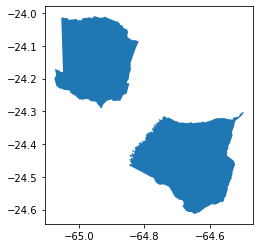

In [114]:
municipios[municipios["IN1"] == "380224"].plot()

Se aplica el método "dissolve" para unir los polígonos de los municipios, generando una sola fila por id sin afectar la forma de los polígonos.

In [115]:
municipios_dissolved = municipios.dissolve(by='IN1').reset_index()

In [116]:
municipios_dissolved[municipios_dissolved["IN1"] == "380224"]

,IN1,geometry,OBJECTID,Entidad,Objeto,FNA,GNA,NAM,SAG,FDC,SHAPE_STAr,SHAPE_STLe
830,380224,(POLYGON Z ((-64.49840913399998 -24.3069828949...,11283,0,Municipio,Municipio San Pedro de Jujuy,Municipio,San Pedro de Jujuy,Direc. Grl. de Inmuebles,Direc. Grl. de Catastro,0.064076,1.424198


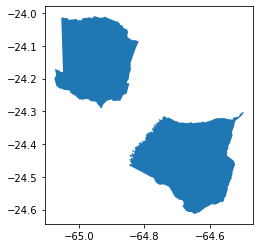

In [117]:
municipios_dissolved[municipios_dissolved["IN1"] == "380224"].plot()

In [118]:
municipios_dissolved.to_file(os.path.join(MUNICIPIOS_OUTPUT, MUNICIPIOS_OUTPUT) + ".shp")